<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/Nadav/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting started with data cleaning

In [1]:
from google.colab import drive
drive.flush_and_unmount()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final_Progect_PapaJohns/All_years.csv')

<ipython-input-3-77098e6204a6>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Final_Progect_PapaJohns/All_years.csv')


In [4]:
df

,Date,Month,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Is_original
0,2022-01-01,1,0.0,NaN,67,NaN,14328.0,1,4.95,0.0,4.95,1
1,2022-01-01,1,0.0,NaN,67,NaN,14354.0,2,9.90,0.0,9.90,1
2,2022-01-01,1,1.0,פיצות מיוחדות 14',4,ביאנקה 14' [],14321.0,1,85.90,0.0,85.90,1
3,2022-01-01,1,1.0,פיצות מיוחדות 14',7,טוסקנית 14' [],14304.0,1,85.90,0.0,85.90,1
4,2022-01-01,1,1.0,פיצות מיוחדות 14',13,המומלצת 14' [],14358.0,1,89.90,0.0,89.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...
258189,2024-12-31,12,52,מנות נלוות,3117,שובר 50 שח DV,7669633.0,5,125.00,0.0,125.00,1
258190,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669582.0,1,0.00,0.0,0.00,1
258191,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.90,0.0,19.90,1
258192,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.90,0.0,19.90,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258194 entries, 0 to 258193
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         255734 non-null  object 
 1   Month        258194 non-null  int64  
 2   סוג פריט     256298 non-null  object 
 3   תאור סוג     239152 non-null  object 
 4   מס' פריט     258194 non-null  object 
 5   תאור פריט    257188 non-null  object 
 6   הזמנה        256298 non-null  float64
 7   כמות         258194 non-null  int64  
 8   סכום         256978 non-null  float64
 9   הנחה לפריט   258194 non-null  float64
 10  אחרי הנחה    257946 non-null  float64
 11  Is_original  258194 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 23.6+ MB


## Convert Date to date format

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
weekday_map = {
    0: 'שני',
    1: 'שלישי',
    2: 'רביעי',
    3: 'חמישי',
    4: 'שישי',
    5: 'שבת',
    6: 'ראשון'}

In [9]:
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

df['Is_Weekend'] = df['Weekday'].isin([4, 5]).astype(int)
df['Day_Name'] = df['Weekday'].map(weekday_map)

In [10]:
df.tail(2)

,Date,Month,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Is_original,Year,Day,Weekday,Is_Weekend,Day_Name
258192,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9,0.0,19.9,1,2024.0,31.0,1.0,0,שלישי
258193,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669633.0,3,384.0,0.0,384.0,1,2024.0,31.0,1.0,0,שלישי


In [11]:
columns_order = [
    'Date',
    'Year',
    'Month',
    'Day',
    'Day_Name',
    'Is_Weekend',
    'תאור פריט',
    'הזמנה',
    'כמות',
    'סכום',
    'Is_original']

df_all_years = df[columns_order].copy()

In [12]:
df_all_years.tail()

,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,הזמנה,כמות,סכום,Is_original
258189,2024-12-31,2024.0,12,31.0,שלישי,0,שובר 50 שח DV,7669633.0,5,125.0,1
258190,2024-12-31,2024.0,12,31.0,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669582.0,1,0.0,1
258191,2024-12-31,2024.0,12,31.0,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.9,1
258192,2024-12-31,2024.0,12,31.0,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9,1
258193,2024-12-31,2024.0,12,31.0,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669633.0,3,384.0,1


## Daily summary of orders

In [13]:
daily_summary = df_all_years.groupby('Date').agg({
    'כמות': 'sum',
    'סכום': 'sum',
    'הזמנה': pd.Series.nunique,
    'Is_Weekend': 'first',
}).reset_index()

# שינוי שמות עמודות לנוחות
daily_summary.rename(columns={
    'כמות': 'Total_Quantity',
    'סכום': 'Total_Amount',
    'הזמנה': 'Unique_Orders'}, inplace=True)

daily_summary

,Date,Total_Quantity,Total_Amount,Unique_Orders,Is_Weekend
0,2022-01-01,498,9221.90,92,1
1,2022-01-02,450,8301.93,100,0
2,2022-01-03,530,9674.29,107,0
3,2022-01-04,568,11089.45,112,0
4,2022-01-05,659,11960.45,121,0
...,...,...,...,...,...
648,2024-12-27,151,3006.15,28,1
649,2024-12-28,684,14321.35,106,1
650,2024-12-29,709,11996.00,110,0
651,2024-12-30,741,15719.00,116,0


## missing values

In [14]:
total_rows = len(df_all_years)

missing_summary = df_all_years.isnull().sum().to_frame(name='Missing Values')
missing_summary['Missing %'] = (missing_summary['Missing Values'] / total_rows * 100).round(2)

missing_summary

,Missing Values,Missing %
Date,2460,0.95
Year,2460,0.95
Month,0,0.00
Day,2460,0.95
Day_Name,2460,0.95
Is_Weekend,0,0.00
תאור פריט,1006,0.39
הזמנה,1896,0.73
כמות,0,0.00
סכום,1216,0.47


## Outliers

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# פונקציה למציאת ערכים חריגים בשיטת IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper

In [16]:
# Quantity
outliers_qty, lower_qty, upper_qty = detect_outliers_iqr(df['כמות'])
print(f'⚠️ Outliers in "Quantity" column: {len(outliers_qty)} rows')
print(f'   Outlier thresholds: Quantity < {lower_qty:.2f} or Quantity > {upper_qty:.2f}\n')

⚠️ Outliers in "Quantity" column: 46945 rows
   Outlier thresholds: Quantity < 1.00 or Quantity > 1.00



In [17]:
df['כמות'].value_counts().sort_index()

,count
כמות,
-1,13
0,44
1,211249
2,40066
3,3084
...,...
3751,1
3839,1
4561,1


In [18]:
# Amount
outliers_sum, lower_sum, upper_sum = detect_outliers_iqr(df['סכום'].dropna())
print(f'⚠️ Outliers in "Amount" column: {len(outliers_sum)} rows')
print(f'   Outlier thresholds: Amount < {lower_sum:.2f} or Amount > {upper_sum:.2f}')

⚠️ Outliers in "Amount" column: 39651 rows
   Outlier thresholds: Amount < -37.35 or Amount > 62.25


In [19]:
df['סכום'].value_counts().sort_index()

,count
סכום,
-3623.00,1
-3575.00,1
-2294.80,1
-316.20,1
-174.90,1
...,...
85913.08,1
91410.00,1
176194.08,1


## Boxplot

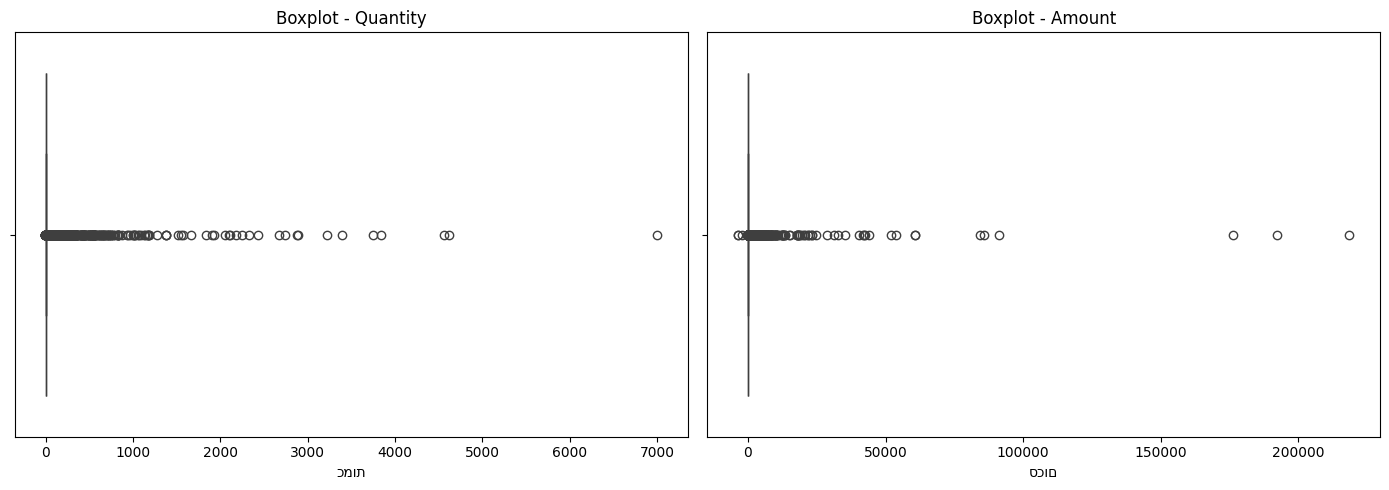

In [20]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['כמות'])
plt.title('Boxplot - Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['סכום'])
plt.title('Boxplot - Amount')

plt.tight_layout()
plt.show()